# outlier_detection_using_IQR(Interquartile range)


**FORMULAS**
* Q1(quartile-1) = df["column_name"].quantile(value)
* Q3(quartile-3) = df["column_name"].quantile(value)
* IQR = Q3 - Q1
* lower_limit = Q1 - 1.5*IQR
* upper_limit = Q3 + 1.5*IQR

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df1 = pd.read_csv("dataset/placement.csv")
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [47]:
df1.shape

(1000, 3)

In [48]:
df1.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


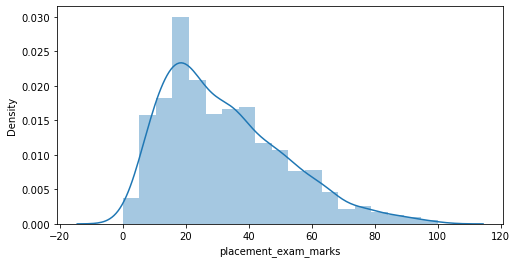

In [49]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df1["placement_exam_marks"])
plt.show()

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


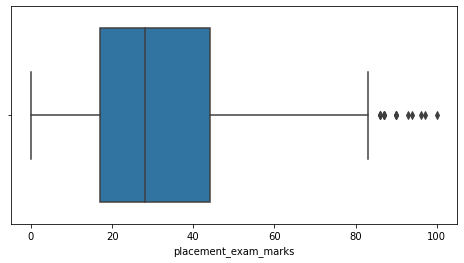

In [50]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(df1["placement_exam_marks"])
plt.show()

In [52]:
df1["placement_exam_marks"].skew()

0.8356419499466834

**Finding the IQR**

In [53]:
Q1 = df1["placement_exam_marks"].quantile(0.25)
Q1

17.0

In [54]:
Q3 = df1["placement_exam_marks"].quantile(0.75)
Q3

44.0

In [55]:
IQR = Q3 - Q1
IQR

27.0

**Finding the lower limit**

In [56]:
ll= Q1 - 1.5*IQR
ll

-23.5

**Finding the upper limit**

In [57]:
ul = Q3 + 1.5*IQR
ul

84.5

**Finding the outliers**

In [58]:
df1[df1["placement_exam_marks"] > ul]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


**Triming**

In [59]:
df2 = df1[(df1["placement_exam_marks"] < ul) | (df1["placement_exam_marks"] < ll) ]
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


**Capping**

In [60]:
df3 = df.copy()
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [61]:
df3['placement_exam_marks'] = np.where(
    df3['placement_exam_marks']>ul,
    ul,
    np.where(
        df3['placement_exam_marks']<ll,
        ll,
        df3['placement_exam_marks']
    )
)

In [62]:
df3

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [63]:
df3[df3["placement_exam_marks"] > ul]

,cgpa,placement_exam_marks,placed


C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

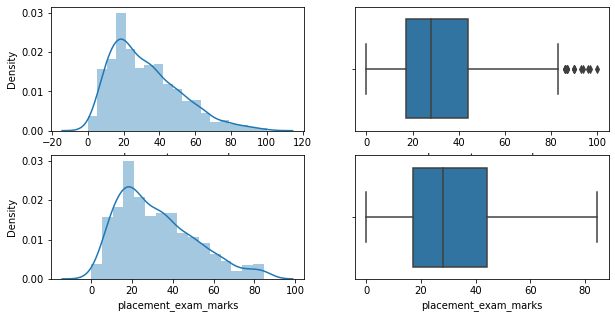

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df1["placement_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df1["placement_exam_marks"])

#New
plt.subplot(2,2,3)
sns.distplot(df3["placement_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(df3["placement_exam_marks"])

plt.show()

# USE TITANIC DATA

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv("dataset/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,NaN,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,NaN,NaN,S
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.381033,2.308642,29.737845,0.523008,0.381594,32.326472
std,257.353842,0.485624,0.836071,13.903642,1.102743,0.806057,49.686344
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.458300
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
df.interpolate(inplace=True)

In [73]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


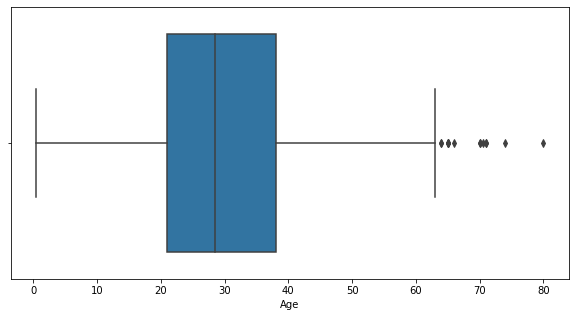

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(df["Age"])
plt.show()

C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


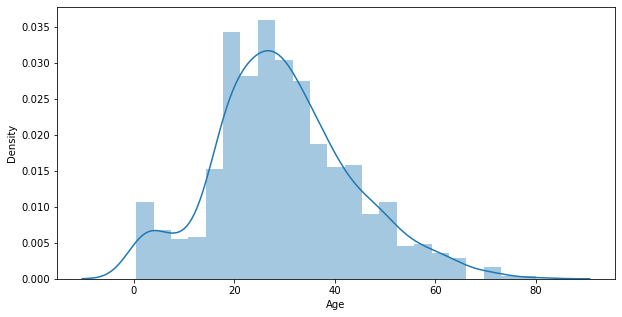

In [76]:
plt.figure(figsize=(10,5))
sns.distplot(df["Age"])
plt.show()

In [77]:
Q1 = df["Age"].quantile(0.25)
Q1

21.0

In [78]:
Q3 = df["Age"].quantile(0.75)
Q3

38.0

In [80]:
IQR = Q3 -Q1
IQR

17.0

In [81]:
UL = Q3 + 1.5*IQR
UL

63.5

In [82]:
LL = Q1 - 1.5*IQR
LL

-4.5

**FINDING THE OUTLIER**

In [83]:
df[df["Age"] > UL]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
95,96,0.0,3,"Shorney, Mr. Charles Joseph",male,65.0,0,0,374910,8.0500,NaN,S
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0.0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
456,457,0.0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
545,546,0.0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S


**capping**

In [84]:
df4 = df.copy()

In [85]:
df4['Age'] = np.where(
    df4['Age']>UL,
    UL,
    np.where(
        df4['Age']<LL,
        LL,
        df4["Age"]
    )
)

In [86]:
df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25000,NaN,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28330,C85,C
2,3,0.0,3,"Heikkinen, Miss. Laina",female,36.5,0,0,STON/O2. 3101282,62.19165,NaN,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.45000,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00000,C148,C


In [87]:
df4[df4["Age"] > UL]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CS-L2-PC09\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

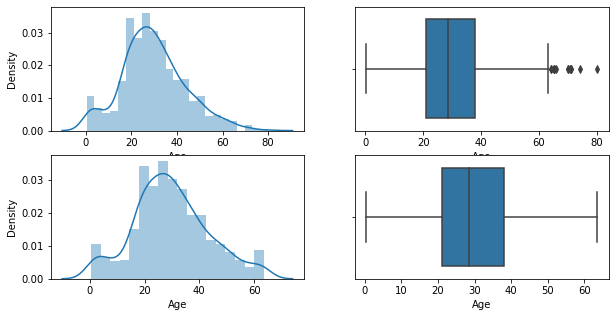

In [88]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df["Age"])

plt.subplot(2,2,2)
sns.boxplot(df["Age"])

#New
plt.subplot(2,2,3)
sns.distplot(df4["Age"])

plt.subplot(2,2,4)
sns.boxplot(df4["Age"])

plt.show()